In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from scipy import stats

In [2]:
#reading the data
data= pd.read_excel('iris.xls')

In [3]:
#performing EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking for missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
#handling missing values
num_cols=data[['SL', 'SW', 'PL']]

In [10]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

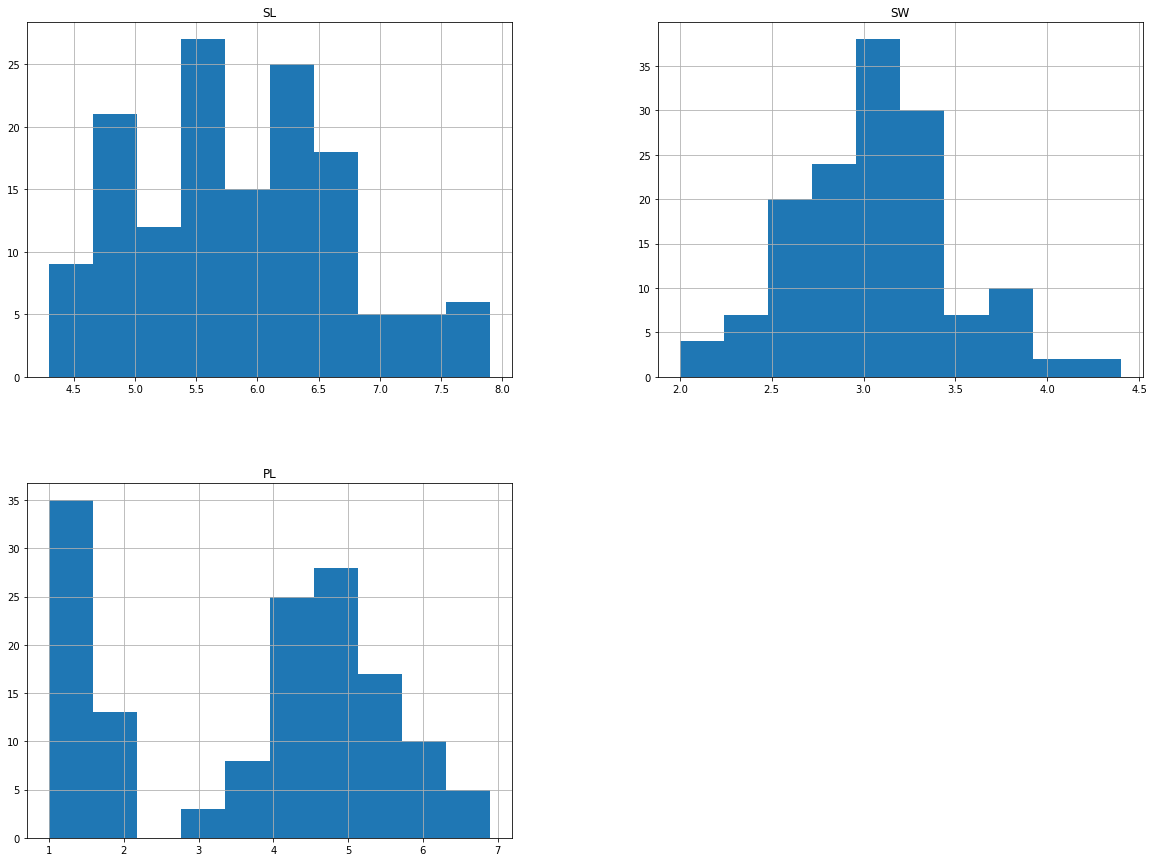

In [11]:
#missing values of normal distributed data can be filled by mean or median
#skewed data can be filled by median
#to find if data normal or skewed we plot it

freqgraph=num_cols.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

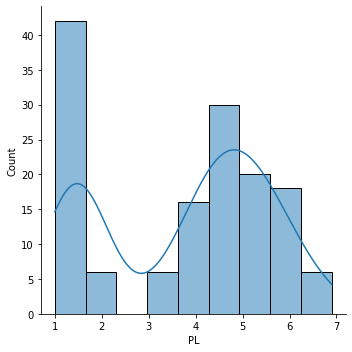

In [12]:
#ploting distplot 
sns.displot(data.PL, kde=True)

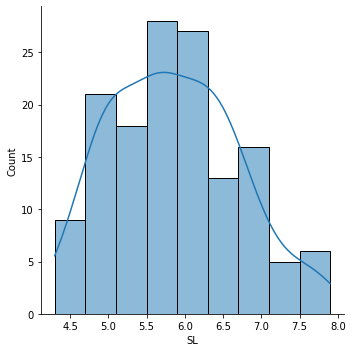

In [13]:
sns.displot(data.SL, kde=True)

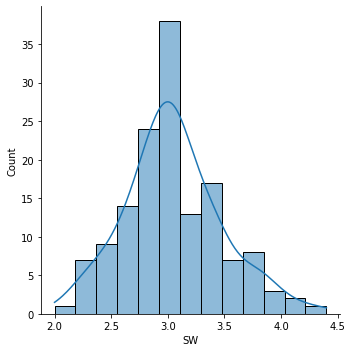

In [14]:
sns.displot(data.SW, kde=True)

In [15]:
#filling missing values of SL and PL by median
for col in ['SL','PL']:
   data[col]=data[col].fillna(data[col].median())

In [16]:
#filling missing values of SW by mean
data['SW']=data['SW'].fillna(data['SW'].mean())

In [17]:
#missing values are handled
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
#performing shapiro test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data.PL)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if (p > alpha):
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.880, p=0.000
Sample does not look Gaussian (reject H0)


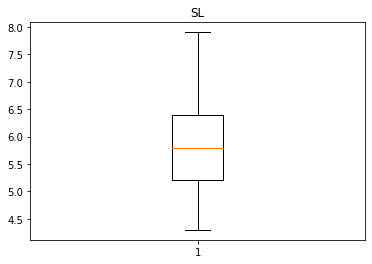

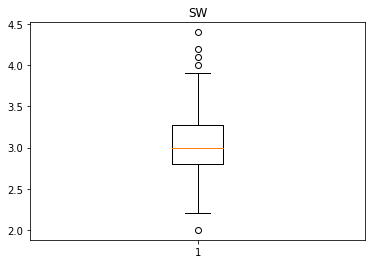

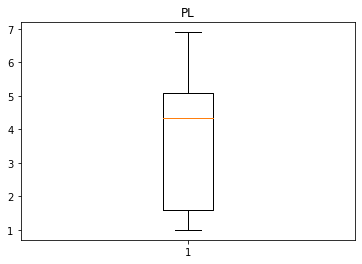

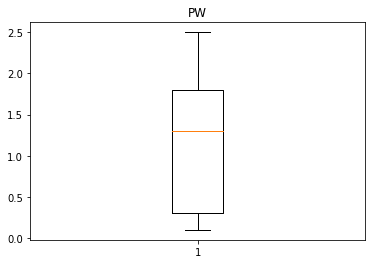

In [19]:
#checking for outliners
#ploting boxplot to see outliners
for i in ['SL', 'SW', 'PL', 'PW']:
       plt.figure()
       plt.boxplot(data[i])
       plt.title(i)

In [20]:
#finding Q1,Q2,Q3
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

<ipython-input-20-f234740ad858>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
<ipython-input-20-f234740ad858>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
<ipython-input-20-f234740ad858>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['SW'],

In [21]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [22]:
data['SW'].median()

3.0

In [23]:
#finding IQR
IQR=stats.iqr(data.SW,interpolation="midpoint")
IQR

0.4500000000000002

In [24]:
#finding min and max limit
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.1249999999999996, 3.9250000000000003)

In [25]:
#finding points greater than max limit as outliners
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [26]:
#finding points less than min limit as outliners
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [27]:
#replacing the outliners by median
data.loc[data['SW']>max_limit,'SW']=np.median(data.SW)

In [28]:
#replacing the outliners by median
data.loc[data['SW']<min_limit,'SW']=np.median(data.SW)

In [29]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


In [30]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


In [31]:
data['Classification'].nunique()

3

In [32]:
#classification

In [33]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
#spliting data as x and y
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [35]:
#splitting as test and training sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [36]:
#performing one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(x_train)


OneHotEncoder(handle_unknown='ignore')

In [37]:
enc.transform(x_train).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
enc.transform(x_test).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
#performing scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [40]:
#performing logistic regression on data
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [41]:
#prediction on x_test
y_pred=model.predict(x_test)

In [42]:
#evaluating our model
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='macro'))
print('Recall=',recall_score(y_test,y_pred,average='macro'))
print('F1=',f1_score(y_test,y_pred,average= 'macro'))

Accuracy= 0.9666666666666667
Precision= 0.9666666666666667
Recall= 0.9696969696969697
F1= 0.9665831244778613


In [43]:
#printing confusion matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [44]:
#KNN
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]#creating empty list for putting accuracy values of different k values
neighbors=np.arange(2,10)#creating array with values 3 to 15

for k in neighbors:#3 to 15 taken by k
       classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#instance called classifier
       model=classifier.fit(x_train,y_train)#model created
       y_pred=model.predict(x_test)
       acc =accuracy_score(y_test,y_pred)
       metric_k.append(acc)#given accuracy to empty list

In [45]:
metric_k#maximum value in this ,that k value taken

[0.9666666666666667,
 1.0,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667]

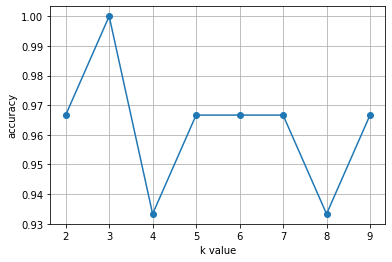

In [46]:
#ploting the list metric_k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [47]:
classifier=KNeighborsClassifier(3,metric='minkowski',p=2)#instance called classifier
model=classifier.fit(x_train,y_train)#model created
y_pred=model.predict(x_test)#predicting the model
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='macro'))
print('Recall=',recall_score(y_test,y_pred,average='macro'))
print('F1=',f1_score(y_test,y_pred,average='macro'))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
F1= 1.0


In [48]:
#printing confusion matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [49]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
#SVM DT RF

In [51]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [52]:
#spliting as test and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [53]:
#importing svm from sklearn
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')#instance with kernal as linear
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred_svm=svmclf.predict(x_test)#predicting using model

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [56]:
print(accuracy_score(y_test,y_pred_svm))#printing accuracy

1.0


In [57]:
print(confusion_matrix(y_test,y_pred_svm))#printing confusion matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [58]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')#instance with kernal as rfb
svmclf.fit(x_train,y_train)

SVC()

In [59]:
y_pred_svm=svmclf.predict(x_test)#prediction on x_test

In [60]:
print(accuracy_score(y_test,y_pred_svm))#printing accuracy

1.0


In [61]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')#instance with kernal as poly
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [62]:
y_pred_svm=svmclf.predict(x_test)#prediction on x_test

In [63]:
print(accuracy_score(y_test,y_pred_svm))#printing accuracy

0.9666666666666667


In [64]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)#instance variable with random state 42
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
y_pred_dt=dt_clf.predict(x_test)#prediction on x_test

In [66]:
print(accuracy_score(y_test,y_pred_dt))#printing accuracy

1.0


In [67]:

print(confusion_matrix(y_test,y_pred_dt))#printing confusion matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [68]:
#Random Forest
from sklearn.ensemble  import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)#instance variable with n_estimators=50
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [69]:
y_pred_rf=rf_clf.predict(x_test)#prediction on x_test

In [70]:

print(accuracy_score(y_test,y_pred_rf))#printing accuracy

1.0


In [71]:
print(confusion_matrix(y_test,y_pred_rf))#printing confusion matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [72]:
#logistic regression had Accuracy= 0.9666666666666667
#knn when k_value=3 had accuracy=1.0
#svm(linear and rfg)had accuracy=1.0 
#svm(poly) had accuracy as 0.9666666666666667
#Decision tree and random forest had accuracy=1.0

In [73]:
#so KNN,SVM(linear,rfg), DT, RF are good classifiers